In [80]:
import matplotlib as mpl
import matplotlib.pyplot as mplt
import numpy as np
import math
from matplotlib import animation

# Set some plotting parameters
mpl.rcParams['lines.linewidth'] = 2;

# Font Size
fontSize_text = 16;
fontSize_latex = 24;

# This turns on inline plotting
#%matplotlib inline

Declare some latex things
$ \DeclareMathOperator{\sech}{sech} $

The mean velocity $\mathbf{u_o}\left(x, y\right) = u_o\left(x, y\right) \hat{i} + v_o\left(x, y\right) \hat{j}$ of an example shear flow is given by:

$u_o = 1 + \tanh y$  

$v_o = 0$

The perturbed velocity amplitudes are given by:  

$u^\prime = a \hat{u}\left(y\right) \sin \alpha \left(x - c t \right)$  
    $ = 2a \sech y \tanh y \sin \alpha \left(x - ct \right)$  

$v^\prime = a \hat{v}\left(y\right) \cos \alpha \left(x - ct \right)$  
    $ = 2a \sech y \cos \alpha \left(x - ct\right)$

Here, $a$ is the amplitude of the fluctuating velocity, and $\alpha = 2 \pi / \lambda$ is the wave number of the perturbation. $c$ is the wave speed. In this example, we set $c = a = \alpha = 1$.

The mean and fluctuating vorticities, $\zeta_o$ and $\zeta^\prime$, are given by:

$\zeta_o = \partial v_o / \partial x - \partial u_o / \partial y = - \sech^2 y $  

$\zeta^\prime = \partial v^\prime / \partial x - \partial u^\prime / \partial y = -4 a \sech^3 y \sin\left(\alpha \left(x - c t \right) \right)$  



In [2]:
# Form the Y coordinate vector
y = np.linspace(0, 3, 100);

# Calculate the mean velocity
u_o = 1 + np.tanh(y);

# Calculate the velocity amplitude functions u^ and v^
a = 1;
u_hat = 2 * a * (1  / np.cosh(y)) * np.tanh(y);
v_hat = 2 * a * ( 1 / np.cosh(y));


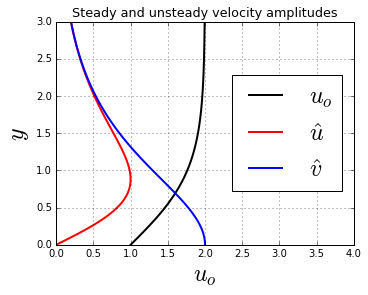

In [3]:
# Define the plot
# The commas are necessary for the legend to work
u_o_plot, = mplt.plot(u_o, y, '-k', label = '$u_o$');
u_hat_plot, = mplt.plot(u_hat, y, '-r', label = '$\hat{u}$');
v_hat_plot, = mplt.plot(v_hat, y, '-b', label = '$\hat{v}$');

# Formatting
mplt.ylabel('$y$', fontsize = fontSize_latex)
mplt.xlabel('$u_o$', fontsize = fontSize_latex)
mplt.title('Steady and unsteady velocity amplitudes', fontsize = 0.8 * fontSize_text)
mplt.axis('square')
mplt.axis([0, 4, 0, 3])
mplt.grid('on')

# Make a legend
mplt.legend([u_o_plot, u_hat_plot, v_hat_plot], \
            ["$u_o$", "$\hat{u}$", "$\hat{v}$"], \
            fontsize=fontSize_latex, loc = 5)


# Show the plot
mplt.show()


In [83]:
# Plotting Velocity field with time
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math
%matplotlib qt 
#%matplotlib inline 

a=0.02
pi=math.pi

def ufield(x,y,t):
    return 1 + np.tanh(2*pi*y) + 2*a*(1/np.cosh(2*pi*y)) * np.tanh(2*pi*y) * np.sin(2*pi*(x-t))

def vfield(x,y,t):
    return 2*a*(1/np.cosh(2*pi*y)) * np.cos(2*pi*(x-t))

x = np.linspace(0,8, num=30)
y = np.linspace(-0.1,0.1, num=20)
X,Y = np.meshgrid(x,y)
t = np.linspace(0,100, num=5000)

def update_quiver(j, ax, fig):
    u = ufield(X,Y,t[j])
    v = vfield(X,Y,t[j])
    Q.set_UVC(u, v)
    ax.set_title('$t$ = '+ str(t[j]))
    return Q,

def init_quiver():
    global Q
    u = ufield(X,Y,t[0])
    v = vfield(X,Y,t[0])
    Q = ax.quiver(X, Y, u, v)
    ax.set_title('$t$ = '+ str(t[0]))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-1,9)
    ax.set_ylim(-0.15,0.15)
    return  Q,

fig =plt.figure()
ax = fig.gca()
ax.set_title('$t$ = '+ str(t[0]))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ani = animation.FuncAnimation(fig, update_quiver, 
                              frames = range(0,t.size),
                              init_func=init_quiver,
                              interval=5,fargs=(ax, fig),blit=False)
plt.show(ani)


# Plotting Pathlines


In [173]:
# Plotting Pathlines
import matplotlib.cm as cm
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math
%matplotlib qt 
pi=math.pi
a=0.02

# The colormap
cmap = cm.jet

#y(0)=x and y(1)=y, dy0=u and dy1=v
def pathline(y,t):
    dy0=1 + np.tanh(2*pi*y[1]) + 2*a*(1/np.cosh(2*pi*y[1])) * np.tanh(2*pi*y[1]) * np.sin(2*pi*(y[0]-t))
    dy1=2*a*(1/np.cosh(2*pi*y[1])) * np.cos(2*pi*(y[0]-t))
    return[dy0,dy1]

N=5;
ypoints=[[0,-0.1],[0,-0.05],[0,0],[0,0.05],[0,0.1]];
ystore=[[]]*N;
time=np.linspace(0,10,1000);
for i in range(0, N):
    yinit=ypoints[i];
    ystore[i]=odeint(pathline,yinit,time);
    

fig = plt.figure()
ax = plt.axes(xlim=(-1, 9), ylim=(-0.15, 0.15))
#line, = ax.plot([], [], linestyle='none', marker='o', color='r')

lines = [ax.plot([], [], linestyle='none', marker='o')[0] for _ in range(N)]
ax.set_title('Pathlines at $t$ = '+ str(time[0]))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


def init():
    for line in lines:
        line.set_data([], [])
    ax.set_title('$t$ = '+ str(time[0]))
    return lines

def animate(i):
    for j,line in enumerate(lines):
        y=ystore[j];
        line.set_data(y[0:i,0],y[0:i,1])
    ax.set_title('$t$ = '+ str(time[i]))
    return lines
    pause(1)
    

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=range(0,time.size), 
                        interval=10, blit=True)
#plt.show(ani)

In [172]:
# Plotting streaklines
import matplotlib.cm as cm
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math
%matplotlib qt 
pi=math.pi
a=0.02

# The colormap
cmap = cm.jet

#y(0)=x and y(1)=y, dy0=u and dy1=v
def pathline(y,t):
    dy0=1 + np.tanh(2*pi*y[1]) + 2*a*(1/np.cosh(2*pi*y[1])) * np.tanh(2*pi*y[1]) * np.sin(2*pi*(y[0]-t))
    dy1=2*a*(1/np.cosh(2*pi*y[1])) * np.cos(2*pi*(y[0]-t))
    return[dy0,dy1]

M=3;# No .of Particles
N=1;# 5 y locations
ypoints=[[0,-0.1],[0,-0.05],[0,0],[0,0.05],[0,0.1]];
ystore=[[[]]*M]*N;
time=np.linspace(0,10,1);
for i in range(0, N):
    yinit=ypoints[i];
    for k in range(0, M):
        time=time+k*0.05;     
        ystore[i][k]=odeint(pathline,yinit,time);
        print(ystore)



[[array([[ 0. , -0.1]]), [], []]]
[[array([[ 0. , -0.1]]), array([[ 0. , -0.1]]), []]]
[[array([[ 0. , -0.1]]), array([[ 0. , -0.1]]), array([[ 0. , -0.1]])]]


In [155]:
ystore1=[[[1, 1], [2, 2]], [[3, 3], [4, 4]], [[5, 5], [6, 6]]]
print(ystore1)
ystore1[2]

[[[1, 1], [2, 2]], [[3, 3], [4, 4]], [[5, 5], [6, 6]]]


[[5, 5], [6, 6]]

In [19]:
#Example Animation 1
from matplotlib import animation
# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=20, blit=True)

In [1]:
#Example Animation 2

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

X, Y = np.mgrid[:2*np.pi:0.2,:2*np.pi:0.2]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='r', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=10, blit=False)

plt.show()